## 1. Introduce 

In this project, we will design and implement a deep learning model that learns to recognize sequences of digits. We will train the model using synthetic data generated by concatenating character images from MNIST.

In [85]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import OneHotEncoder

### 1.1  Import Data 

In [99]:
# Load the dataset
train = pd.read_csv("./Input/train.csv")
test = pd.read_csv("./Input/test.csv")

import matplotlib.pyplot as plt
%matplotlib inline

# Display the first record
display(train.head(n=1))

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 1.2 Check Data

In [100]:
column_target = [x for x in train.columns if x not in test.columns]
labels = train[column_target]

In [101]:
column_target

['label']

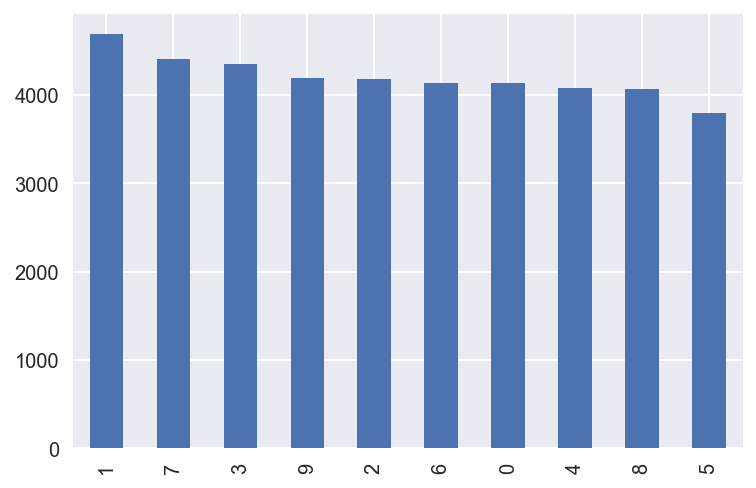

In [102]:
#Distribution of the digits in the dataset
labels.iloc[:,0].value_counts().plot(kind='bar')
plt.show()

In [103]:
ohe = OneHotEncoder()
ohe.fit(labels)
ohe.n_values_, ohe.feature_indices_, ohe.active_features_

(array([10]), array([ 0, 10]), array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]))

In [104]:
y_train = ohe.transform(labels).toarray()

In [105]:
X_train = train.drop(column_target, axis=1)

In [106]:
print("Train shape: {}. Test shape: {}. Target shape {}".format(X_train.shape, test.shape, labels.shape))
X_train.head()

Train shape: (42000, 784). Test shape: (28000, 784). Target shape (42000, 1)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [107]:
#Analyse the pixels intensity values
subset_pixels = X_train.iloc[:, :]
subset_pixels.describe()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [108]:
image_size = X_train.shape[1]
print("Number of pixels for each image: {}".format(image_size))
print("Pixels ranges from {} to {}".format(X_train.values.min(), X_train.values.max()))

image_width = image_height = np.ceil(np.sqrt(image_size)).astype(np.int)
print("Image size: {}x{}".format(image_width, image_height))

Number of pixels for each image: 784
Pixels ranges from 0 to 255
Image size: 28x28


It is a [0]


/Users/sunghwanki/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


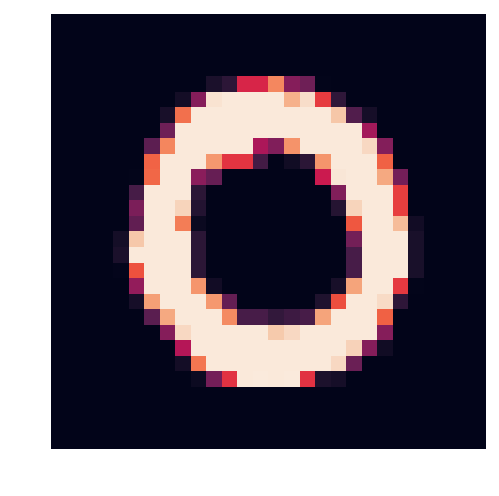

In [109]:
# check index 1's image
index = 1    
image = X_train.ix[index, :].values
label = labels.values[index]
    
plt.axis('off')
plt.imshow(image.reshape(image_width, image_height),)
print("It is a {}".format(label))

## 2. Model

### 2.1 CNN

In [110]:
# parameters
learning_rate = 0.001
training_epochs = 15
batch_size = 100

In [111]:
# input place holders
X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, 10])

In [112]:
# weights & bias for nn layers
W = tf.Variable(tf.random_normal([784, 10]))
b = tf.Variable(tf.random_normal([10]))

In [113]:
hypothesis = tf.matmul(X, W) + b

In [114]:
# define cost/loss & optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
    logits=hypothesis, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

In [119]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    for step in range(2000):
        sess.run(optimizer, feed_dict={X: X_train, Y: y_train})
        if step % 100 == 0:
            loss = sess.run(cost, feed_dict={
                                 X: X_train, Y: y_train})
            print("Step: {:5}\tLoss: {:.3f}".format(
                step, loss))

    pred = sess.run(hypothesis, feed_dict={X: test})


Step:     0	Loss: 3785.462
Step:   100	Loss: 2217.564
Step:   200	Loss: 1378.908
Step:   300	Loss: 890.171
Step:   400	Loss: 604.873
Step:   500	Loss: 450.906
Step:   600	Loss: 364.306
Step:   700	Loss: 308.649
Step:   800	Loss: 269.280
Step:   900	Loss: 239.793
Step:  1000	Loss: 216.959
Step:  1100	Loss: 198.693
Step:  1200	Loss: 183.348
Step:  1300	Loss: 170.415
Step:  1400	Loss: 159.268
Step:  1500	Loss: 149.383
Step:  1600	Loss: 140.592
Step:  1700	Loss: 132.756
Step:  1800	Loss: 125.753
Step:  1900	Loss: 119.421


In [120]:
pred

array([[ 1037.79077148, -5315.71728516,  5016.61962891, ...,
        -4021.30249023,  -400.44052124, -2663.05664062],
       [ 6948.48095703, -7349.88427734,   964.40924072, ...,
         1180.31616211,   658.74298096, -1094.75244141],
       [ -645.1729126 ,  -391.66854858,    56.92597198, ...,
         -781.10595703,   706.35339355,   793.63568115],
       ..., 
       [  -69.13868713,   876.30731201,  1475.21826172, ...,
          140.53511047,  1890.22070312,   888.91357422],
       [-1432.24694824, -2941.29589844, -2248.86376953, ...,
          191.09014893,   655.83190918,  2530.34765625],
       [  -90.47065735, -5965.92431641,  3323.6496582 , ...,
        -4799.18066406,   672.0958252 ,  -255.17810059]], dtype=float32)